In [45]:
import numpy as np
import matplotlib.pyplot as plt

### Perceptron neural network

Presented below is code for a perceptron neural network. 

The general structure and theoretical explanation of the perceptron code was found on an article describing the perceptron, linked here: https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

the process is roughly the following: 

1. Feed the network some list of datapoints which are all assigned to a 'category' (in the following code represented by integers 0 and 1)
1. Train the neural network to generate 'weights' which, when used to manipulate the data, reliably categorize the datapoints into their proper category
1. Apply the neural network to another dataset and see if its predictions remain accurate

In this notebook i set up the functions essentially as described in the article, but generate my own large dataset consisting of two roughly distinct groupings of data, and test the accuracy and thus applicability of the neural network to datasets of various sizes.



In [2]:
def predict(n, w):
    a = w[0]     
    for i in range(len(n)-1):
        a += w[i+1] * n[i] 
    return 1.0 if a >= 0.0 else 0.0 

def trainweights(train, rate, epoch):
    w = [0.0 for i in range(len(train[0]))]
    for i in range(epoch):
        for n in train:
            prediction = predict(n, w)
            error = n[-1] - prediction
            w[0] = w[0] + rate*error
            for j in range(len(row) - 1):
                w[j+1] = w[j+1] + rate * error * row[j]
    return w

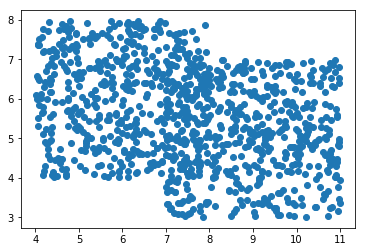

In [154]:
#i'll now generate a dataset with two distinct groupings
#for the purpose of showing that the trainweights function is working properly.
n = 1000
dataset_train = np.zeros((n,3))

for i in range(n):
    k = np.random.randint(0,2)
    if k == 0:
        dataset_train[i] = [np.random.uniform(4,8), np.random.uniform(4,8), 0]
    if k == 1:
        dataset_train[i] = [np.random.uniform(7,11), np.random.uniform(3,7), 1]
        
        
plt.scatter(x = dataset_train.T[0], y = dataset_train.T[1])   #here i visualize the dataset to show that there are two fairly distinct groupings

l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset_train, l_rate, n_epoch)


C:\Users\blake\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


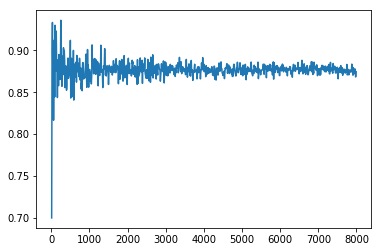

In [166]:
#now that we've trained the network on the above dataset, let's apply it to a series of datasets
#grouped the same way but with increasing numbers of datapoints

#we will then see if prediction accuracy of the trained neural network depends on the size of the dataset,
#and if so, what that relationship appears to be

x = np.arange(0, 8000, 10) #generates a list of dataset sizes to evaluate the neural network at
accuracylist = []

for i in x:
    dataset_test = np.empty((i,3)) 
    for j in range(i):
        k = np.random.randint(0,2)
        if k == 0:
            dataset_test[j] = [np.random.uniform(4,8), np.random.uniform(4,8), 0]
        if k == 1:
            dataset_test[j] = [np.random.uniform(7,11), np.random.uniform(3,7), 1]
            
    #the following code determines the accuracy of the neural network by comparing its prediction to the test value for each
    #data point and eventually producing the fraction of guesses which were correct.
    
    accuracy = 0
    for n in dataset_test:
        prediction = predict(n, weights)
        if n[-1] == prediction:
            accuracy += 1
        else:
            pass
    accuracy = accuracy/i
    #here we add this value to a list so that it can be graphed vs dataset size.
    accuracylist.append(accuracy)
    
plt.plot(x, accuracylist)


the trained neural network, although volatile at lower dataset sizes, appears to settle around an accuracy of ~87 or 88%. this is pretty good and shows that it can be applied to large datasets.

i plan to use this style of neural network to categorize such a dataset (undetermined as of now, but i am actively searching).

this notebook should serve as the groundwork for my final project, as it sets up the code for the neural network i'll likely use (perhaps with some modifications for data reading purposes) and shows its applicability to large datasets. 

i apologize for the lateness, and hope that this is a satisfactory show of progress on my project.